# Formulation
## Practical Exercises

### Exercise 2
In this experiment, the training and test examples are generated with the function $y=x$ with Gaussian noise added.
We fit a linear function and a 10th degree polynomial.

For the 10th degree polynomial, we fit using polynomial regression and then with ridge regression. In scikit learn, ridge regression finds $\min_w ||Xw - y||_2^2 +\alpha||w||_2^2$.

* Run the experiment. 
* Then change the variable *data_size* to 10 and run it again.

Comment on the experiment results.

C:\Users\shiwei\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:98: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Linear test set error: 1.02
Poly test set error: 11910.85
Ridge poly test set error: 1.06


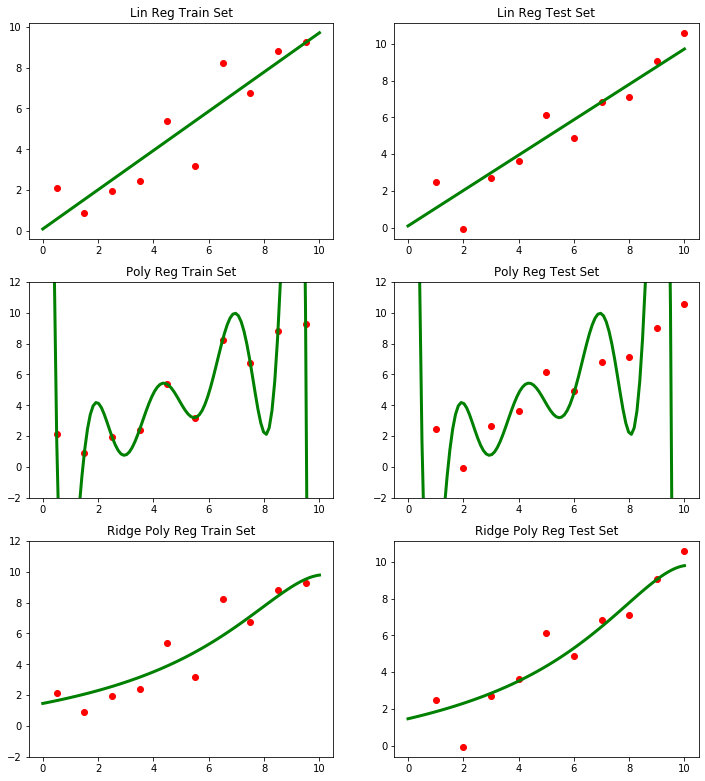

In [1]:
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

# Set seed for random number generator to make results reproducible
np.random.seed(1) 

# Number of data points in train and test sets
data_size = 10
data_interval = 10.0/data_size

reg = 0.01
if data_size == 10:
    reg = 0.2
    
# Linear regression model
linear = LinearRegression(fit_intercept=True,normalize=True)
# Polynomial regression model, degree the same as data size
poly = Pipeline([('poly', PolynomialFeatures(degree=10)),
                 ('lin', LinearRegression(fit_intercept=True, normalize=True))])

# Polynomial regression model with ridge regression, degree the same as data size
ridgepoly = Pipeline([('poly', PolynomialFeatures(degree=10)),
                      ('ridgereg', Ridge(alpha = reg, fit_intercept=True,normalize=True))])

# Construct training set
# Output is y = x + noise
xtrain = np.arange(data_interval/2, 10, data_interval)
train_noise = np.random.normal(0, 1, data_size)
ytrain = xtrain + train_noise

# Fit the models
linear = linear.fit(xtrain[:, np.newaxis], ytrain)
poly = poly.fit(xtrain[:, np.newaxis], ytrain)
ridgepoly = ridgepoly.fit(xtrain[:, np.newaxis], ytrain)


# Construct test set, interleaved with training set
xtest = np.arange(data_interval,10 + data_interval/2, data_interval)
test_noise = np.random.normal(0, 1, data_size)

# Do predictions
linear_pred = linear.predict(xtest[:,np.newaxis])
poly_pred = poly.predict(xtest[:,np.newaxis])
ridgepoly_pred = ridgepoly.predict(xtest[:,np.newaxis])

# Measure mean squared error
ytest = xtest + test_noise
linerror = mean_squared_error(ytest, linear_pred)
polyerror = mean_squared_error(ytest, poly_pred)
ridgepolyerror = mean_squared_error(ytest, ridgepoly_pred)

# Plotting
x_plot = np.linspace(0, 10, 100)

fig = plt.figure(1, figsize=(12, 13.5))
fig.clf()

sub1 = fig.add_subplot(3,2,1)
sub1.set_title('Lin Reg Train Set')
sub1.scatter(xtrain, ytrain,  color='red')
sub1.plot(x_plot, linear.predict(x_plot[:,np.newaxis]), color='green',linewidth=3)

sub2 = fig.add_subplot(3,2,2)
sub2.set_title('Lin Reg Test Set')
sub2.scatter(xtest, ytest,  color='red')
sub2.plot(x_plot, linear.predict(x_plot[:,np.newaxis]), color='green',linewidth=3)

sub3 = fig.add_subplot(3,2,3)
sub3.set_title('Poly Reg Train Set')
sub3.scatter(xtrain, ytrain,  color='red')
sub3.set_ylim([-2,12])
sub3.plot(x_plot, poly.predict(x_plot[:,np.newaxis]), color='green',linewidth=3)

sub4 = fig.add_subplot(3,2,4)
sub4.set_title('Poly Reg Test Set')
sub4.scatter(xtest, ytest,  color='red')
sub4.set_ylim([-2,12])
sub4.plot(x_plot, poly.predict(x_plot[:,np.newaxis]), color='green',linewidth=3)

sub5 = fig.add_subplot(3,2,5)
sub5.set_title('Ridge Poly Reg Train Set')
sub5.scatter(xtrain, ytrain,  color='red')
sub5.set_ylim([-2,12])
sub5.plot(x_plot, ridgepoly.predict(x_plot[:,np.newaxis]), color='green',linewidth=3)

sub6 = fig.add_subplot(3,2,6)
sub6.set_title('Ridge Poly Reg Test Set')
sub6.scatter(xtest, ytest,  color='red')
sub6.plot(x_plot, ridgepoly.predict(x_plot[:,np.newaxis]), color='green',linewidth=3)

fig.show()
print("Linear test set error: " + "{0:.2f}".format(linerror))
print("Poly test set error: " + "{0:.2f}".format(polyerror))
print("Ridge poly test set error: " + "{0:.2f}".format(ridgepolyerror))

C:\Users\shiwei\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:98: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Linear test set error: 0.86
Poly test set error: 0.92
Ridge poly test set error: 0.88


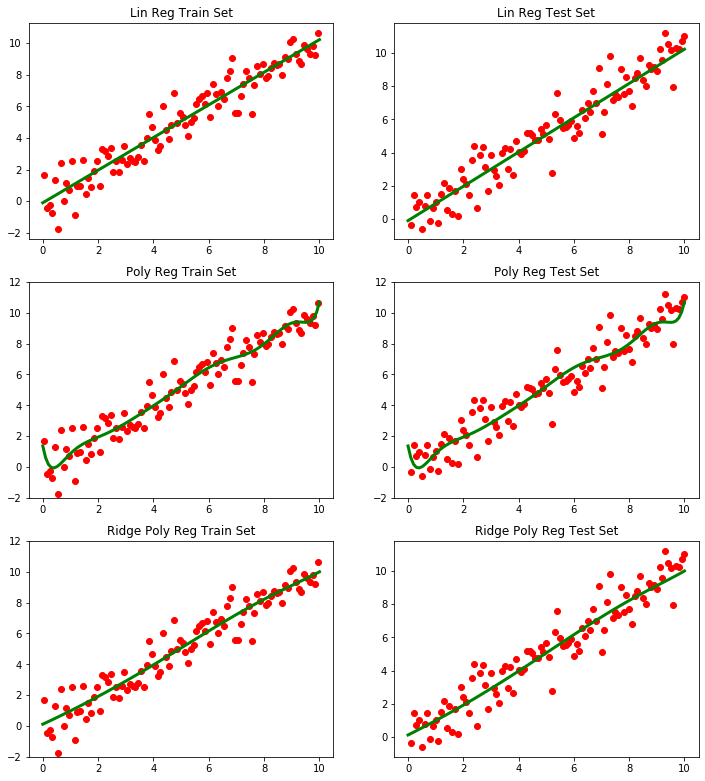

In [2]:
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

# Set seed for random number generator to make results reproducible
np.random.seed(1) 

# Number of data points in train and test sets
data_size = 100
data_interval = 10.0/data_size

reg = 0.01
if data_size == 10:
    reg = 0.2
    
# Linear regression model
linear = LinearRegression(fit_intercept=True,normalize=True)
# Polynomial regression model, degree the same as data size
poly = Pipeline([('poly', PolynomialFeatures(degree=10)),
                 ('lin', LinearRegression(fit_intercept=True, normalize=True))])

# Polynomial regression model with ridge regression, degree the same as data size
ridgepoly = Pipeline([('poly', PolynomialFeatures(degree=10)),
                      ('ridgereg', Ridge(alpha = reg, fit_intercept=True,normalize=True))])

# Construct training set
# Output is y = x + noise
xtrain = np.arange(data_interval/2, 10, data_interval)
train_noise = np.random.normal(0, 1, data_size)
ytrain = xtrain + train_noise

# Fit the models
linear = linear.fit(xtrain[:, np.newaxis], ytrain)
poly = poly.fit(xtrain[:, np.newaxis], ytrain)
ridgepoly = ridgepoly.fit(xtrain[:, np.newaxis], ytrain)


# Construct test set, interleaved with training set
xtest = np.arange(data_interval,10 + data_interval/2, data_interval)
test_noise = np.random.normal(0, 1, data_size)

# Do predictions
linear_pred = linear.predict(xtest[:,np.newaxis])
poly_pred = poly.predict(xtest[:,np.newaxis])
ridgepoly_pred = ridgepoly.predict(xtest[:,np.newaxis])

# Measure mean squared error
ytest = xtest + test_noise
linerror = mean_squared_error(ytest, linear_pred)
polyerror = mean_squared_error(ytest, poly_pred)
ridgepolyerror = mean_squared_error(ytest, ridgepoly_pred)

# Plotting
x_plot = np.linspace(0, 10, 100)

fig = plt.figure(1, figsize=(12, 13.5))
fig.clf()

sub1 = fig.add_subplot(3,2,1)
sub1.set_title('Lin Reg Train Set')
sub1.scatter(xtrain, ytrain,  color='red')
sub1.plot(x_plot, linear.predict(x_plot[:,np.newaxis]), color='green',linewidth=3)

sub2 = fig.add_subplot(3,2,2)
sub2.set_title('Lin Reg Test Set')
sub2.scatter(xtest, ytest,  color='red')
sub2.plot(x_plot, linear.predict(x_plot[:,np.newaxis]), color='green',linewidth=3)

sub3 = fig.add_subplot(3,2,3)
sub3.set_title('Poly Reg Train Set')
sub3.scatter(xtrain, ytrain,  color='red')
sub3.set_ylim([-2,12])
sub3.plot(x_plot, poly.predict(x_plot[:,np.newaxis]), color='green',linewidth=3)

sub4 = fig.add_subplot(3,2,4)
sub4.set_title('Poly Reg Test Set')
sub4.scatter(xtest, ytest,  color='red')
sub4.set_ylim([-2,12])
sub4.plot(x_plot, poly.predict(x_plot[:,np.newaxis]), color='green',linewidth=3)

sub5 = fig.add_subplot(3,2,5)
sub5.set_title('Ridge Poly Reg Train Set')
sub5.scatter(xtrain, ytrain,  color='red')
sub5.set_ylim([-2,12])
sub5.plot(x_plot, ridgepoly.predict(x_plot[:,np.newaxis]), color='green',linewidth=3)

sub6 = fig.add_subplot(3,2,6)
sub6.set_title('Ridge Poly Reg Test Set')
sub6.scatter(xtest, ytest,  color='red')
sub6.plot(x_plot, ridgepoly.predict(x_plot[:,np.newaxis]), color='green',linewidth=3)

fig.show()
print("Linear test set error: " + "{0:.2f}".format(linerror))
print("Poly test set error: " + "{0:.2f}".format(polyerror))
print("Ridge poly test set error: " + "{0:.2f}".format(ridgepolyerror))

### Exercise 4
In this experiment, we plot the learning curves for data generated from two isotropic Gaussians with centers $(-1, -1, -1, -1), (1, 1, 1, 1)$ and standard deviations of 1. In this case, both models are able to represent the optimal decision boundary and we would like to see which method converges faster.

Comment on the learning curves. Give your reasons for the differences you observe.

For details on scikit learn's
* Linear Discriminant Analysis, see http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.htmlFor 


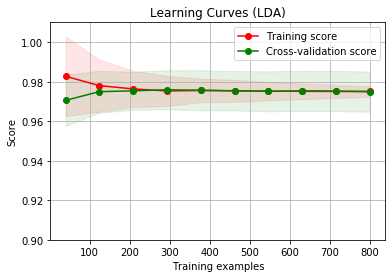

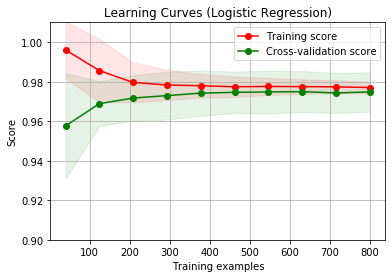

In [4]:
# Code modified from http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.05, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

n_samples = 1000    
# Generate samples from two Gaussians centers
centers = [(-1, -1, -1, -1), (1, 1, 1, 1)]
X, y = make_blobs(n_samples=n_samples, n_features=4, cluster_std=1.0,
                  centers=centers, shuffle=True, random_state=1)

title = "Learning Curves (LDA)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LinearDiscriminantAnalysis()
plot_learning_curve(estimator, title, X, y, ylim=(0.9, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (Logistic Regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = LogisticRegression(C=1000) # large C to avoid regularization
plot_learning_curve(estimator, title, X, y, (0.9, 1.01), cv=cv, n_jobs=4)

plt.show()

### Exercise 5

We will use the 20 Newsgroup dataset in the experiment.

**Twenty Newsgroup Dataset:**
According to the website http://qwone.com/~jason/20Newsgroups/

*The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. To the best of our knowledge, it was originally collected by Ken Lang, probably for his paper “Newsweeder: Learning to filter netnews,” though he does not explicitly mention this collection. The 20 newsgroups collection has become a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering.*

Run the experiment comparing the learning curves of Naive Bayes and logistic regression in classifying documents from 'alt.atheism' and 'soc.religion.christian'. Replace 'soc.religion.christian' with 'comp.graphics' and rerun the experiment.

Comment on the learning curves. What do you think are the reasons for the differences you observe?

* For Bernoulli Naive Bayes in Scikit Learn, see http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html
* For Logistic regression, see http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression.

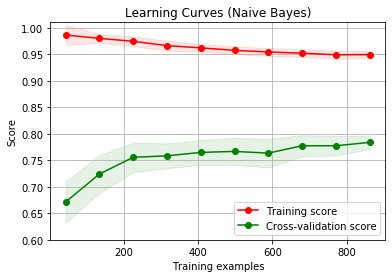

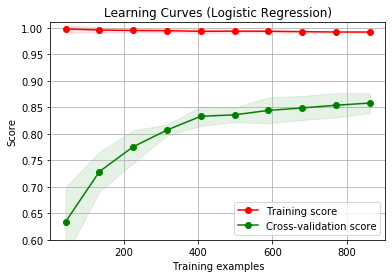

In [5]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB

# Select only 2 categories to speed things up
#categories = ['alt.atheism', 'comp.graphics']
# Comment away the previous line and uncomment the next line to change the datasets
categories = ['alt.atheism', 'soc.religion.christian']

# Fetch training and test sets
twenty_train = fetch_20newsgroups(subset='train', remove=('headers','footers','quotes'),
                                  categories=categories, shuffle=True, random_state=42)
vectorizer = TfidfVectorizer(binary=False, use_idf = True)
X = vectorizer.fit_transform(twenty_train.data)
y = twenty_train.target

title = "Learning Curves (Naive Bayes)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = BernoulliNB(alpha=0.000001)
plot_learning_curve(estimator, title, X, y, ylim=(0.6, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (Logistic Regression)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = LogisticRegression(C=100, multi_class='multinomial', solver='newton-cg')
plot_learning_curve(estimator, title, X, y, (0.6, 1.01), cv=cv, n_jobs=4)

plt.show()

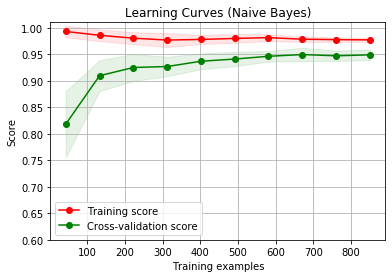

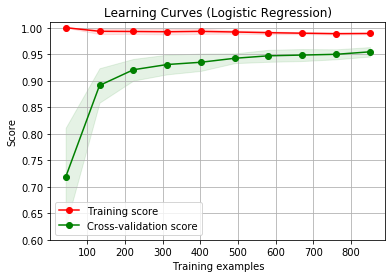

In [5]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB

# Select only 2 categories to speed things up
categories = ['alt.atheism', 'comp.graphics']
# Comment away the previous line and uncomment the next line to change the datasets
# categories = ['alt.atheism', 'soc.religion.christian']

# Fetch training and test sets
twenty_train = fetch_20newsgroups(subset='train', remove=('headers','footers','quotes'),
                                  categories=categories, shuffle=True, random_state=42)
vectorizer = TfidfVectorizer(binary=False, use_idf = True)
X = vectorizer.fit_transform(twenty_train.data)
y = twenty_train.target

title = "Learning Curves (Naive Bayes)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = BernoulliNB(alpha=0.000001)
plot_learning_curve(estimator, title, X, y, ylim=(0.6, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (Logistic Regression)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = LogisticRegression(C=100, multi_class='multinomial', solver='newton-cg')
plot_learning_curve(estimator, title, X, y, (0.6, 1.01), cv=cv, n_jobs=4)

plt.show()

### Exercise 6
In this experiment, we look at the effect of the number of folds and the training set size when doing cross validation. On the digits data set, run 10-fold cross validation with 50% of the dataset as training data. 

* Change the number of folds to 2-fold and observe the effect. 

Comment on the outcomes of the experiments.

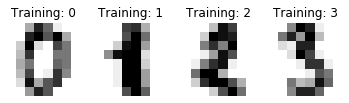

Data set size: 898
Best parameters set found on development set:
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.107 (+/-0.001) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.921 (+/-0.016) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.325 (+/-0.037) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.601 (+/-0.039) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.971 (+/-0.000) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.943 (+/-0.007) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.643 (+/-0.032) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.976 (+/-0.005) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.964 (+/-0.000) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Test set accuracy: 0.99


In [7]:
# Modified from http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_digits.html

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

digits = datasets.load_digits()

# Show the images
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(1, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
plt.show()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset 
# 50% of training data as training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [0.1, 1, 10]}]

# Do cross validation with grid search
# Do 10-fold cross-validation
#clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=10 )
# Comment away the previous line and uncomment the next line to change to 2-fold
clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=2)

clf.fit(X_train, y_train)

print("Data set size: " + str(len(X_train)))
print("Best parameters set found on development set:")
print(clf.best_params_)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: " + "{0:.2f}".format(accuracy))

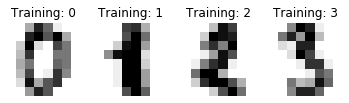

Data set size: 898
Best parameters set found on development set:
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.107 (+/-0.007) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.950 (+/-0.034) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.753 (+/-0.069) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.689 (+/-0.099) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.982 (+/-0.033) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.962 (+/-0.040) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.725 (+/-0.098) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.986 (+/-0.022) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.983 (+/-0.031) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Test set accuracy: 0.99


C:\Users\shiwei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [6]:
# Modified from http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_digits.html

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

digits = datasets.load_digits()

# Show the images
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(1, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
plt.show()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset 
# 50% of training data as training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [0.1, 1, 10]}]

# Do cross validation with grid search
# Do 10-fold cross-validation
clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=10 )
# Comment away the previous line and uncomment the next line to change to 2-fold
# clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=2)

clf.fit(X_train, y_train)

print("Data set size: " + str(len(X_train)))
print("Best parameters set found on development set:")
print(clf.best_params_)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: " + "{0:.2f}".format(accuracy))

### Exercise 7

Regularizing using the $\ell_1$ norm rather than the $\ell_2$ norm induces sparsity and can serve as a method for feature selection. This is often called Lasso. The optimization objective for Lasso is $\frac{1}{2m}||y - Xw||^2_2 + \alpha ||w||_1$. We will compare the two methods using polynomial regression with a 10th degree polynomial using noisy training data from a linear function to see if we get a sparse solution.

Comment on the outcome of the experiment.

Lasso poly test set error: 1.27
Ridge poly test set error: 1.24
Prediction of Lasso poly at x = 15 is 15.28 when the true value is 15.
Prediction of Ridge poly at x = 15 is 363.39 when the true value is 15.
Lasso coeffs: array([0.        , 0.83653236, 0.01050862, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])
Ridge coeffs: array([ 0.00000000e+00,  5.74053667e-01,  6.01189105e-02,  1.46511399e-03,
       -1.91333763e-04, -3.38773148e-05, -3.25379850e-06, -1.94362732e-07,
        1.67424080e-09,  2.79158385e-09,  5.72018372e-10])


C:\Users\shiwei\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


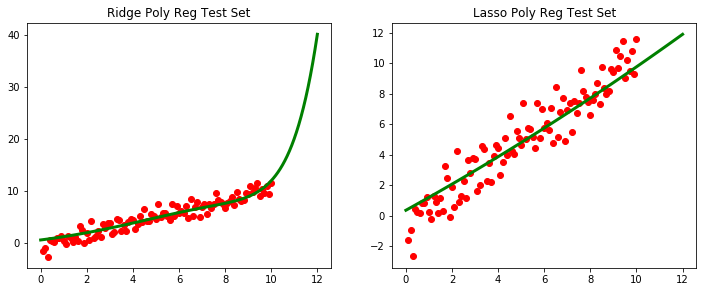

In [7]:
from sklearn.linear_model import Lasso

np.random.seed(100) 
data_size = 100
data_interval = 10.0/data_size
xtrain = np.arange(data_interval/2, 10, data_interval)
train_noise = np.random.normal(0, 1, data_size)
ytrain = xtrain + train_noise
xtest = np.arange(data_interval,10 + data_interval/2, data_interval)
test_noise = np.random.normal(0, 1, data_size)
ytest = xtest + test_noise

# Polynomial regression model with Lasso, degree the same as data set size
lassopoly = Pipeline([('poly', PolynomialFeatures(degree=10)),
                      ('lassoreg', Lasso(alpha = 0.01, fit_intercept=True,normalize=True))])
lassopoly = lassopoly.fit(xtrain[:, np.newaxis], ytrain)

lassopoly_pred = lassopoly.predict(xtest[:,np.newaxis])
lassopolyerror = mean_squared_error(ytest, lassopoly_pred)
ridgepoly_pred = ridgepoly.predict(xtest[:,np.newaxis])
ridgepolyerror = mean_squared_error(ytest, ridgepoly_pred)

x_plot = np.linspace(0, 12, 120)
fig = plt.figure(1, figsize=(12, 4.5))
fig.clf()

sub1 = fig.add_subplot(1,2,1)
sub1.set_title('Ridge Poly Reg Test Set')
sub1.scatter(xtest, ytest,  color='red')
sub1.plot(x_plot, ridgepoly.predict(x_plot[:,np.newaxis]), color='green',linewidth=3)

sub2 = fig.add_subplot(1,2,2)
sub2.set_title('Lasso Poly Reg Test Set')
sub2.scatter(xtest, ytest,  color='red')
sub2.plot(x_plot, lassopoly.predict(x_plot[:,np.newaxis]), color='green',linewidth=3)

fig.show()
print("Lasso poly test set error: " + "{0:.2f}".format(lassopolyerror))
print("Ridge poly test set error: " + "{0:.2f}".format(ridgepolyerror))
print("Prediction of Lasso poly at x = 15 is " + "{0:.2f}".format(lassopoly.predict([[15]])[0]) + " when the true value is 15.")
print("Prediction of Ridge poly at x = 15 is " + "{0:.2f}".format(ridgepoly.predict([[15]])[0]) + " when the true value is 15.")
print("Lasso coeffs: " + repr(lassopoly.named_steps['lassoreg'].coef_))
print("Ridge coeffs: " + repr(ridgepoly.named_steps['ridgereg'].coef_))